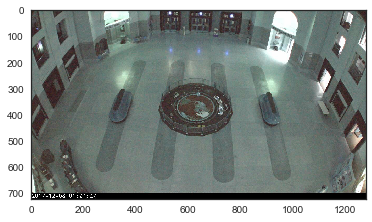

In [4]:
import cv2
import time
import seaborn as sns

# Will use matplotlib for showing the image
from matplotlib import pyplot as plt
%matplotlib inline

URL = 'http://184.80.5.148/mjpg/video.mjpg'

# Test capturing a frame from mJPG
cap = cv2.VideoCapture(URL)

ret, frame = cap.read()

with sns.axes_style("white"):
    plt.imshow(frame)


In [5]:
frame.shape

(720, 1280, 3)

In [6]:
import subprocess

In [7]:
# Resize image to speed up processing
small = cv2.resize(frame, (0,0), fx=0.5, fy=0.5);
cv2.imwrite('cam.png', small)

True

In [8]:
# Specify subprocess command
cmd = "./darknet detector test cfg/coco.data cfg/yolo.2.0.cfg yolo.2.0.weights cam.png"

In [9]:
# Run command and get output
output = subprocess.check_output(cmd.split())

In [10]:
# Decode to UTF-8, split by new line
output.decode("utf-8").split("\n")

['cam.png: Predicted in 4.423699 seconds.', 'oven: 26%', '']

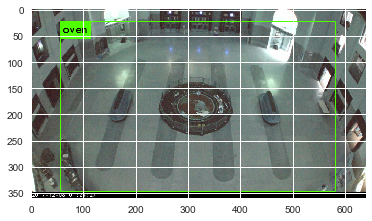

In [11]:
# Plot prediction image
predictions = cv2.imread('predictions.png')
plt.imshow(predictions)

In [12]:
# Import necessary libraries for image display and output
from IPython.display import display, Image, clear_output


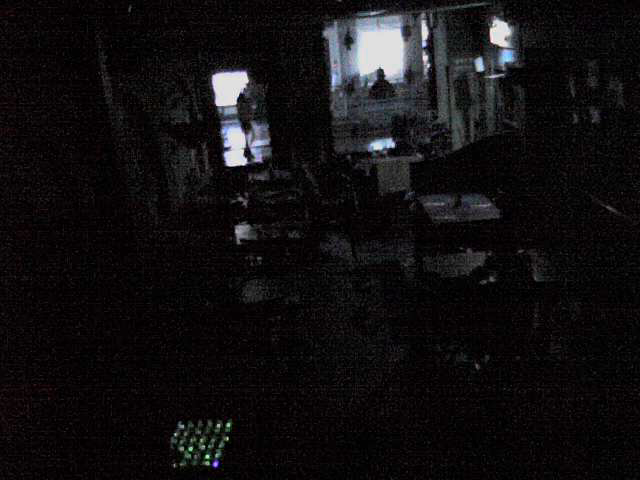

'cam.png: Predicted in 4.791689 seconds.'

'0 people detected.'

'Last updated at 01:28:00.'

KeyboardInterrupt: 

In [18]:

lastMin = time.time()//60
firstMin = lastMin
numChecks = 0
totalPeople = 0
xMinute = []
yPeople = []
last = 0
while True:
    last = time.time()
    
    # Webcam URL
    cap = cv2.VideoCapture('http://84.35.225.233:83/SnapshotJPEG?Resolution=640x480&amp;amp;Quality=Clarity&amp;amp;1509566566')
    
    currentMin = time.time() // 60
    
    ret, frame = cap.read()

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB);
    cv2.imwrite('cam.png', frame)
    
    # Run command, collect output
    cmd = "./darknet detector test cfg/coco.data cfg/yolo.2.0.cfg yolo.2.0.weights cam.png"# -thresh .2"
    output = subprocess.check_output(cmd.split())
    output = output.decode("utf-8").split("\n")

    # Clear IPython plot
    clear_output(wait=True)
    
    # Display predictions, output number of people detected
    display(Image('./predictions.png'))
    numPeople = len([i.split(":")[0] for i in output if i.split(":")[0] == 'person'])
    display(output[0])
    display("{} people detected.".format(numPeople))
    display("Last updated at {}.".format(time.strftime("%H:%M:%S", time.localtime())))
    
    numChecks += 1
    totalPeople += numPeople
    
    # Update graph every minute
    if currentMin > lastMin:
        xMinute.append(lastMin)
        yPeople.append(round(totalPeople/numChecks))
        lastMin = currentMin
        numChecks = 0
        totalPeople = 0
        
    # Only plot after first minute, to ensure that data is extant
    if currentMin != firstMin:
        plt.plot(xMinute, yPeople)
        #plt.xlim(min(xMinute)-5, max(xMinute)+5)
        plt.ylim(0, max(yPeople)+1)
        plt.xlabel('Time')
        plt.ylabel('Number of People')
        display(plt.gcf())